<a href="https://colab.research.google.com/github/inevertoldu/snuaied/blob/main/google_data_vis_seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 서울 지역 일별 기온 변화 데이터를 통한 분석

### 데이터 파일 읽기

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls -l

total 836556
drwx------ 7 root root      4096 May 16 06:50 drive
-rw-r--r-- 1 root root    109890 May 16 07:21 map.html
-rw-r--r-- 1 root root 856508513 May 16 07:16 rf.bin
drwxr-xr-x 1 root root      4096 May 16 06:52 sample_data


In [11]:
import pandas as pd

df = pd.read_excel('sample_data/seoul_daily_temp.xlsx', engine='openpyxl')
df.columns = ['date', 'mean', 'max', 'max_t', 'min', 'min_t', 'diff']
df = df.dropna()
df.set_index('date', inplace=True)
df.head()

,mean,max,max_t,min,min_t,diff
date,,,,,,
2003-01-01,-4.7,-1.0,15:46:00,-7.1,22:31:00,6.1
2003-01-02,-4.3,0.0,14:21:00,-9.2,04:47:00,9.2
2003-01-03,-3.6,-0.3,14:05:00,-6.8,23:58:00,6.5
2003-01-04,-10.2,-6.8,00:00:00,-13.4,23:56:00,6.6
2003-01-05,-12.8,-9.1,15:56:00,-15.5,07:44:00,6.4


In [ ]:
# 최저 및 최고기온시각은 제거
df.drop(['max_t', 'min_t'], axis=1, inplace=True)

In [ ]:
df.describe()

,mean,max,min,diff
count,7303.000000,7303.000000,7303.000000,7303.000000
mean,13.012776,17.592003,9.122073,8.469930
std,10.532454,10.696155,10.659163,2.866788
min,-14.900000,-10.700000,-18.600000,1.100000
25%,4.150000,8.400000,0.300000,6.500000
50%,14.400000,19.400000,9.900000,8.500000
75%,22.400000,26.900000,18.700000,10.400000
max,33.700000,39.600000,30.300000,18.500000


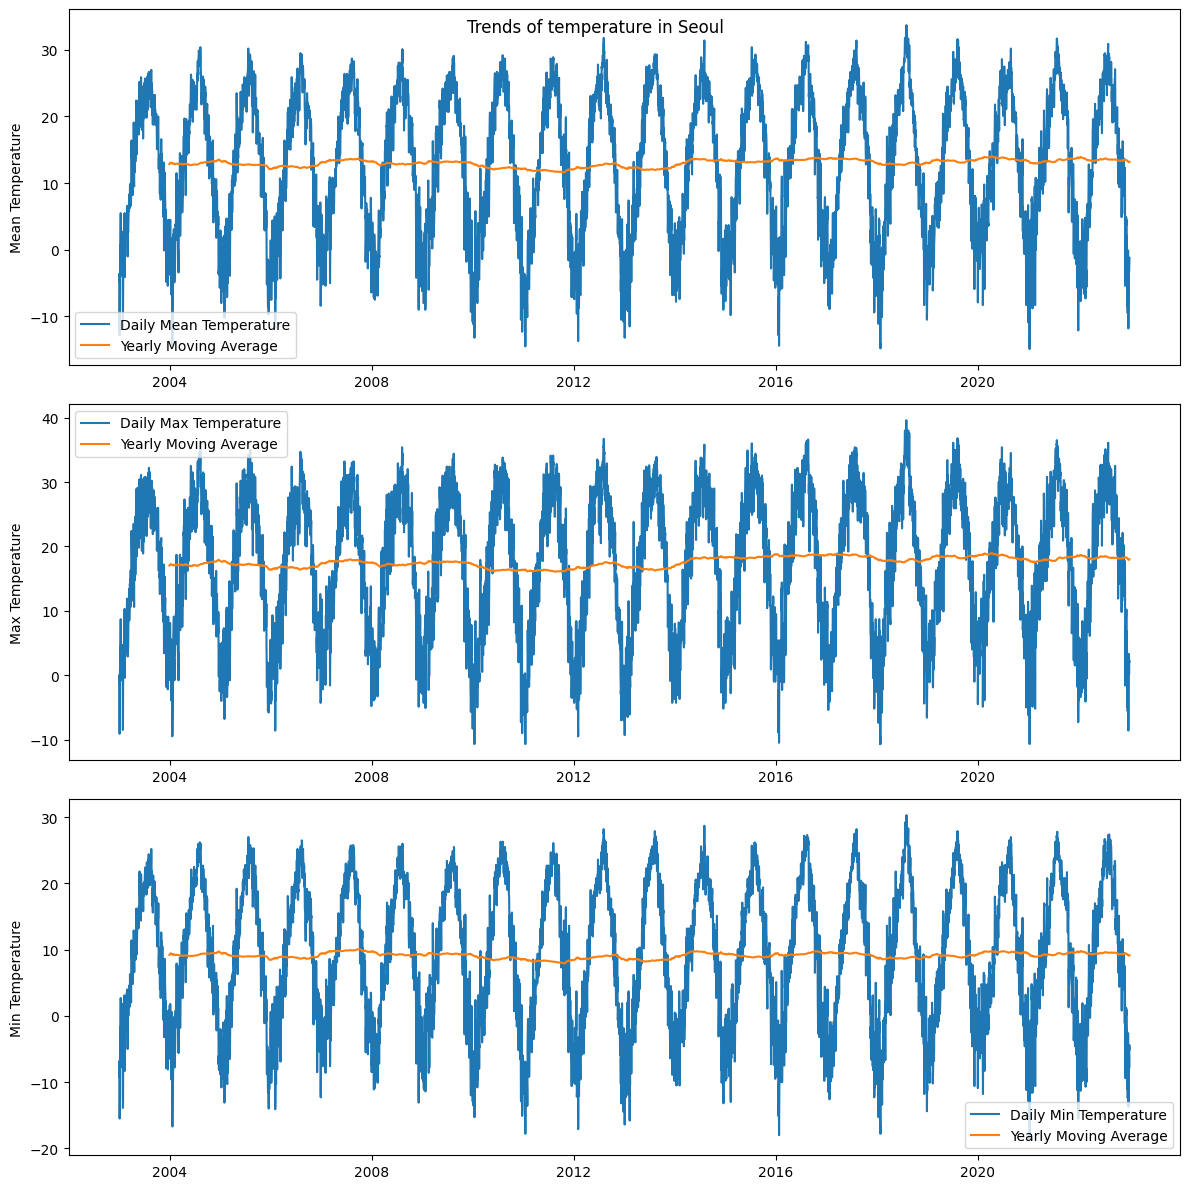

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# 평균기온의 변화
rolling_mean = df['mean'].rolling(window=365).mean()

plt.sca(axes[0])
plt.plot(df.index, df['mean'], label='Daily Mean Temperature')
plt.plot(df.index, rolling_mean, label='Yearly Moving Average')
plt.ylabel('Mean Temperature')
plt.legend()

# 최고기온의 변화
rolling_mean = df['max'].rolling(window=365).mean()

plt.sca(axes[1])
plt.plot(df.index, df['max'], label='Daily Max Temperature')
plt.plot(df.index, rolling_mean, label='Yearly Moving Average')
plt.ylabel('Max Temperature')
plt.legend()

# 최저기온의 변화
rolling_mean = df['min'].rolling(window=365).mean()

plt.sca(axes[2])
plt.plot(df.index, df['min'], label='Daily Min Temperature')
plt.plot(df.index, rolling_mean, label='Yearly Moving Average')
plt.ylabel('Min Temperature')
plt.legend()

# 그래프 간 간격 조정
plt.tight_layout()

# 전체 그림 제목 설정
fig.suptitle('Trends of temperature in Seoul')

# 그래프 표시
plt.show()

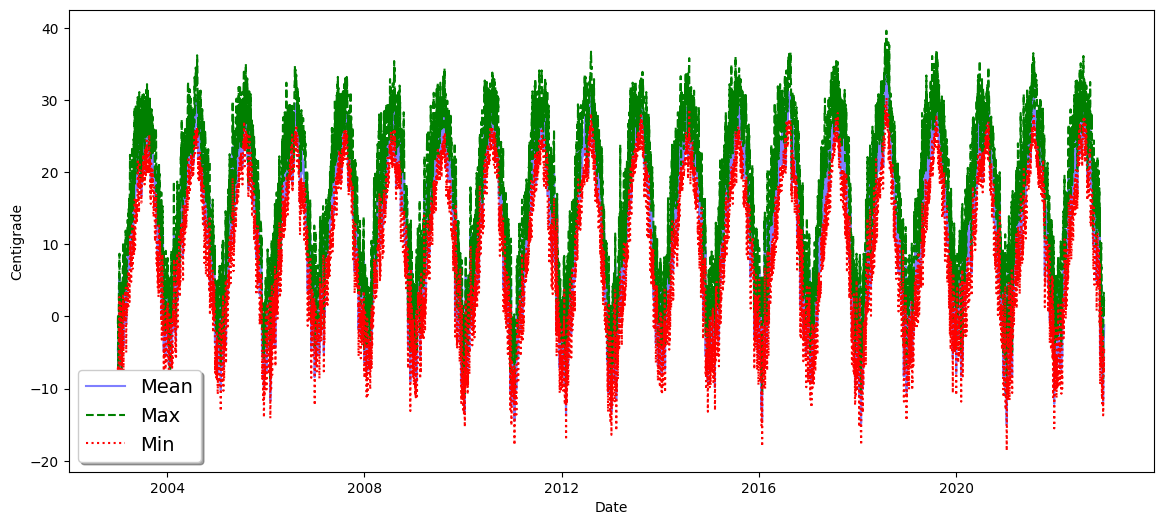

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.loc[:, 'mean'], 'b-', label='Mean', alpha=0.5)
plt.plot(df.loc[:, 'max'], 'g--', label='Max')
plt.plot(df.loc[:, 'min'], 'r:', label='Min')

plt.xlabel('Date')
plt.ylabel('Centigrade')
plt.legend(loc='best', fontsize=14, frameon=True, shadow=True)

plt.show()

## Box Whisker Plot

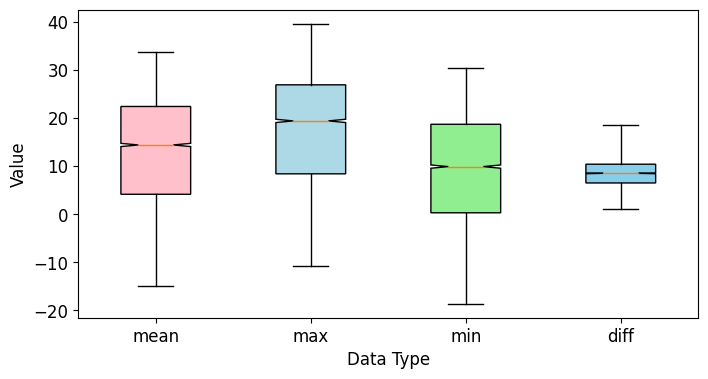

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.size'] = 12

data = [df['mean'], df['max'], df['min'], df['diff']]
names = ['mean', 'max', 'min', 'diff']

fig, ax = plt.subplots(figsize=(8, 4))

box = ax.boxplot(data, notch=True, patch_artist=True, whis=2.5)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')
ax.set_xticks([1, 2, 3, 4], names)

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'skyblue']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

### 월별 데이터로 변환해 살펴 보기

In [ ]:
df_month = df.resample('M').mean()
df_month.index = df_month.index.to_period('M')

# 폭염일수를 구하도록 함(일 최고기온 33도 이상)
df_hot = df.resample('M').apply(lambda x: (x['max'] >=33 ).sum())
df_hot.index = df_hot.index.to_period('M')
df_month = pd.concat([df_month, pd.DataFrame(df_hot, columns=['hot'])], axis=1)
df_month.head()

,mean,max,min,diff,hot
date,,,,,
2003-01,-2.551613,1.103226,-5.832258,6.935484,0
2003-02,2.657143,6.642857,-0.685714,7.328571,0
2003-03,6.493548,10.567742,2.864516,7.703226,0
2003-04,13.160000,17.873333,8.976667,8.896667,0
2003-05,19.551613,24.980645,14.383871,10.596774,0


In [ ]:
df_month.index = df_month.index.to_timestamp()

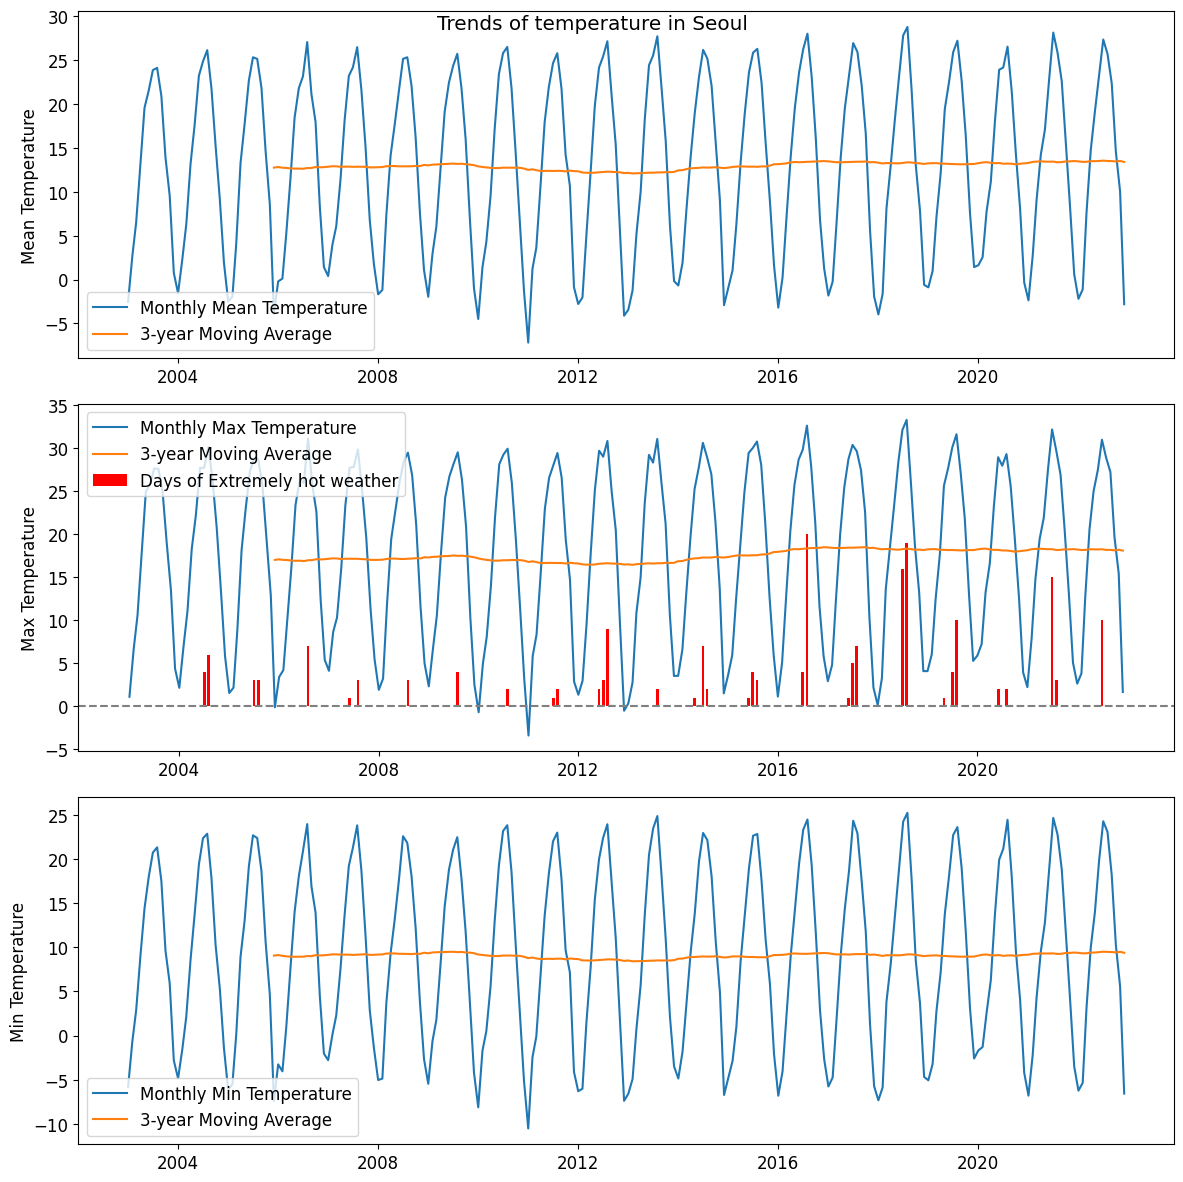

In [ ]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# 평균기온의 변화
rolling_mean = df_month['mean'].rolling(window=36).mean()

plt.sca(axes[0])
plt.plot(df_month.index, df_month['mean'], label='Monthly Mean Temperature')
plt.plot(df_month.index, rolling_mean, label='3-year Moving Average')
plt.ylabel('Mean Temperature')
plt.legend()

# 최고기온의 변화
rolling_mean = df_month['max'].rolling(window=36).mean()

plt.sca(axes[1])
plt.plot(df_month.index, df_month['max'], label='Monthly Max Temperature')
plt.plot(df_month.index, rolling_mean, label='3-year Moving Average')
plt.bar(df_month.index, df_month['hot'], color='red', width=20, label='Days of Extremely hot weather')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Max Temperature')
plt.legend()

# 최저기온의 변화
rolling_mean = df_month['min'].rolling(window=36).mean()

plt.sca(axes[2])
plt.plot(df_month.index, df_month['min'], label='Monthly Min Temperature')
plt.plot(df_month.index, rolling_mean, label='3-year Moving Average')
plt.ylabel('Min Temperature')
plt.legend()

# 그래프 간 간격 조정
plt.tight_layout()

# 전체 그림 제목 설정
fig.suptitle('Trends of temperature in Seoul')

# 그래프 표시
plt.show()

### 계절별 데이터로 변환해 살펴 보기

In [ ]:
# 연도와 월 데이터 추출
df_month['year'] = df_month.index.year
df_month['month'] = df_month.index.month

# 계절 생성
df_month['season'] = df_month.groupby('year')['month'].rank().astype(int)
df_month['season'] = df_month['season'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
                                             5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                             9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df_month['season'] = pd.Categorical(df_month['season'], categories=season_order, ordered=True)
df2 = df_month.sort_values(['year', 'season'], ascending=[True, True])

df2

,mean,max,min,diff,hot,year,month,season
date,,,,,,,,
2003-03-01,6.493548,10.567742,2.864516,7.703226,0,2003,3,Spring
2003-04-01,13.160000,17.873333,8.976667,8.896667,0,2003,4,Spring
2003-05-01,19.551613,24.980645,14.383871,10.596774,0,2003,5,Spring
2003-06-01,21.546667,25.770000,17.983333,7.786667,0,2003,6,Summer
2003-07-01,23.848387,27.651613,20.703226,6.948387,0,2003,7,Summer
...,...,...,...,...,...,...,...,...
2022-10-01,14.564516,19.677419,10.267742,9.409677,0,2022,10,Autumn
2022-11-01,10.030000,15.430000,5.573333,9.856667,0,2022,11,Autumn
2022-01-01,-2.196774,2.625806,-6.238710,8.864516,0,2022,1,Winter


In [ ]:
df_season = df_month.groupby(['year', 'season']).mean()

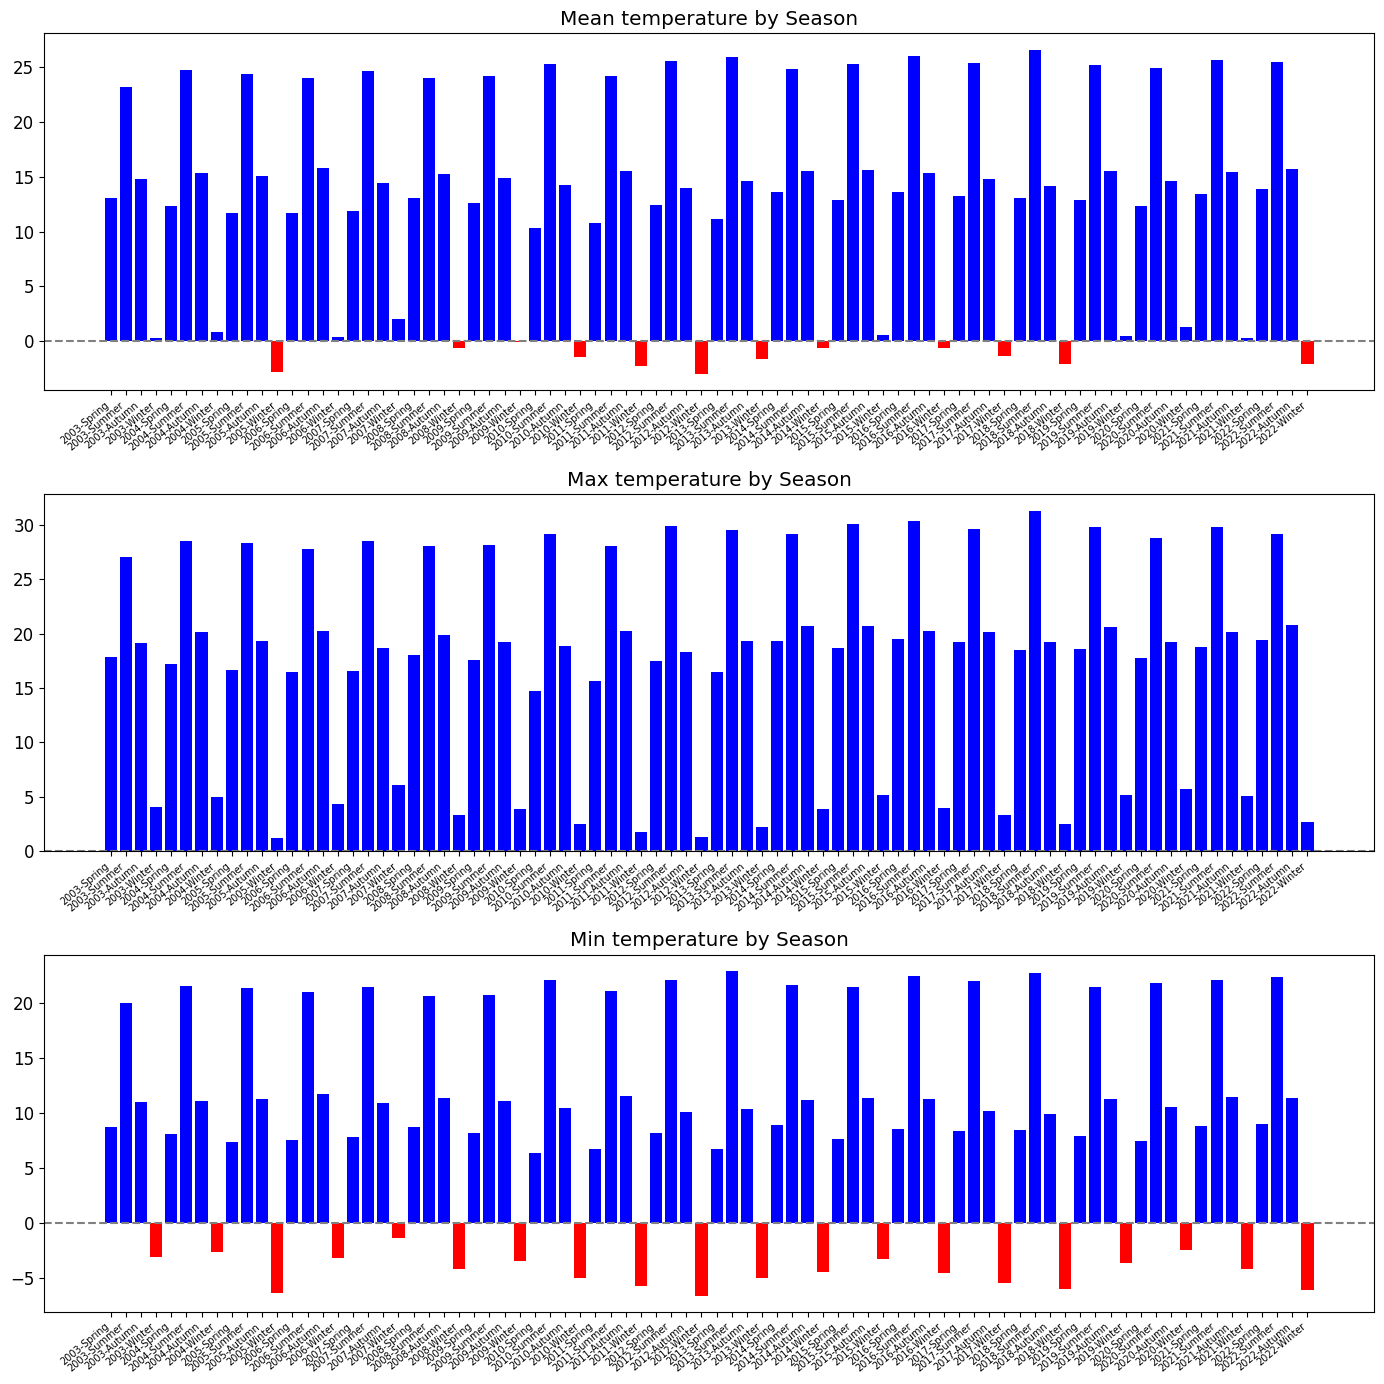

In [ ]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 14))

grouped = df_season.groupby('year')

# 평균 기온
plt.sca(axes[0])
plt.bar(df_season.index.map(lambda x: f'{x[0]}-{x[1]}'), df_season['mean'],
        color=['blue' if val >= 0 else 'red' for val in df_season['mean']])
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=40, fontsize=7, ha='right')
plt.title('Mean temperature by Season')

# 최고 기온
plt.sca(axes[1])
plt.bar(df_season.index.map(lambda x: f'{x[0]}-{x[1]}'), df_season['max'],
        color=['blue' if val >= 0 else 'red' for val in df_season['max']])
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=40, fontsize=7, ha='right')
plt.title('Max temperature by Season')

# 최저 기온
plt.sca(axes[2])
plt.bar(df_season.index.map(lambda x: f'{x[0]}-{x[1]}'), df_season['min'],
        color=['blue' if val >= 0 else 'red' for val in df_season['min']])
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=40, fontsize=7, ha='right')
plt.title('Min temperature by Season')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

# 기온 변화 데이터를 이용하여 예측 모형 만들어 보기

In [ ]:
import pandas as pd

df = pd.read_excel('sample_data/seoul_daily_temp.xlsx', engine='openpyxl')
df.columns = ['date', 'mean', 'max', 'max_t', 'min', 'min_t', 'diff']
df = df.dropna()
df.set_index('date', inplace=True)
df.drop(['max_t', 'min_t'], axis=1, inplace=True)
df = df.reindex(columns=['max', 'min', 'diff', 'mean'])

In [ ]:
df.head()

,max,min,diff,mean
date,,,,
2003-01-01,-1.0,-7.1,6.1,-4.7
2003-01-02,0.0,-9.2,9.2,-4.3
2003-01-03,-0.3,-6.8,6.5,-3.6
2003-01-04,-6.8,-13.4,6.6,-10.2
2003-01-05,-9.1,-15.5,6.4,-12.8


In [ ]:
import matplotlib.pyplot as plt

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1) 
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

def draw_plot(actl, pred):
    fig = plt.figure(figsize=(14, 7))
    plt.plot(df.index[n_train_hours:n_train_hours+test_X.shape[0]], actl, 
             color='skyblue', label='actual', ls='-', lw=1.5, alpha=0.3)
    plt.plot(df.index[n_train_hours:n_train_hours+test_X.shape[0]], pred, 
             color='red', label='predicted', ls='-', alpha=0.8)
    plt.title('Temperature')
    plt.legend()
    
    plt.show()

### Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn을 이용하려면 2차원 데이터여야 한다.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

scaler2 = MinMaxScaler(feature_range=(0, 1))
scaler2.fit_transform(df['mean'].values.reshape(-1, 1))

n_in = 15 # 과거 15일을 통해 예측
n_out = 1
n_features = df.shape[1]

reframed = series_to_supervised(scaled, n_in, 1)
values = reframed.values

n_train_hours = round(df.shape[0] * 0.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-n_features], train[:, -1:]
test_X, test_y = test[:, :-n_features], test[:, -1:]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5842, 60) (5842, 1) (1446, 60) (1446, 1)


### Random Forest for time-series forecasting

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# fit model
rf = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rf.fit(train_X, train_y.ravel())

CPU times: user 10min 28s, sys: 2.97 s, total: 10min 31s
Wall time: 7min 10s


RandomForestRegressor(n_estimators=2000, n_jobs=-1)

만약 실행 시간이 오래 걸린다면 다음의 데이터를 불러올 수도 있다.

In [ ]:
# 모델 저장하기

#import joblib
#joblib.dump(rf, 'rf.bin')

['rf.bin']

In [ ]:
# 모델 불러오기
import joblib

rf = joblib.load('rf.bin')

In [ ]:
# Evaluate score for the model
print('Train score: %.3f' % rf.score(train_X, train_y))
print('Test score: %.3f' % rf.score(test_X, test_y))

Train score: 0.994
Test score: 0.952


MAE: 1.661
MSE: 5.059
RMSE: 2.249


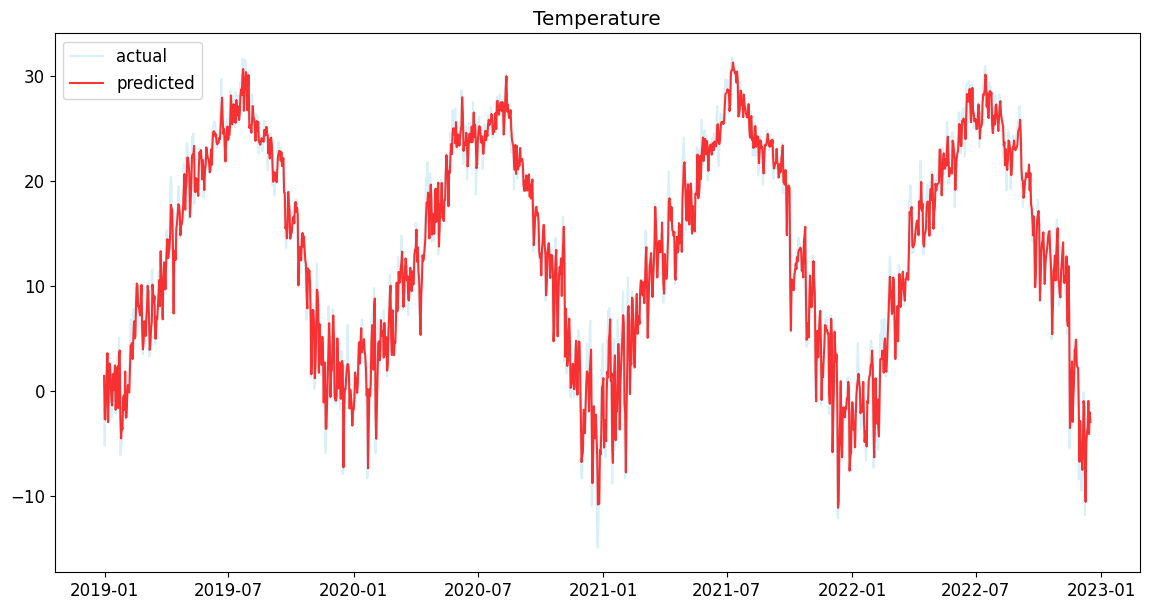

In [ ]:
# make a one-step prediction
yhat = rf.predict(test_X)

actl = scaler2.inverse_transform(test_y)
pred = scaler2.inverse_transform(yhat.reshape(-1, 1))
mae = mean_absolute_error(actl, pred)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mean_squared_error(actl, pred))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(actl, pred)))

draw_plot(actl[:,0], pred[:,0])

# 지도 데이터 이용하기

In [ ]:
import numpy as np
import pandas as pd
import folium
import webbrowser
import json

In [ ]:
# CSV 파일 경로
csvFile = 'sample_data/Si_Do_Ele_students_Teacher_ratio.csv'

# CSV 파일 읽기
SiDodf = pd.read_csv(csvFile, encoding='euc-kr')
print(SiDodf)

    code   region  student  teacher  ratio
0     11    서울특별시   422293    28727  14.70
1     21    부산광역시   155589    10152  15.33
2     22    대구광역시   126122     9013  13.99
3     23    인천광역시   160853    10026  16.04
4     24    광주광역시    88990     6068  14.67
5     25    대전광역시    82743     6007  13.77
6     26    울산광역시    68512     4322  15.85
7     29  세종특별자치시    27892     1956  14.26
8     31      경기도   769744    46568  16.53
9     32      강원도    75617     6648  11.37
10    33     충청북도    86709     6675  12.99
11    34     충청남도   122424     9250  13.24
12    35     전라북도    97731     8179  11.95
13    36     전라남도    94952     8121  11.69
14    37     경상북도   131374    10257  12.81
15    38     경상남도   194606    13773  14.13
16    39  제주특별자치도    41068     2840  14.46


### 파이차트 이용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 30s (325 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122519 files and dir

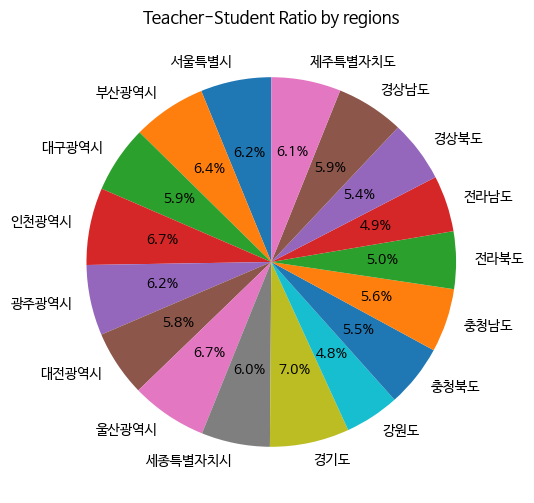

In [ ]:
import matplotlib.pyplot as plt
import platform

# 맥(Mac)에서 한글 폰트 설정
if platform.system() == 'Darwin':  # 맥OS일 경우
    plt.rc('font', family='AppleGothic')
else: # 다른 OS일 경우
    plt.rc('font', family='NanumBarunGothic')
    
# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(SiDodf['ratio'], labels=SiDodf['region'], autopct='%1.1f%%', startangle=90)

# 차트 타이틀 설정
plt.title('Teacher-Student Ratio by regions')

# 차트 보이기
plt.show()

In [ ]:
# 지도 경계 데이터 파일 경로
SiDo_geo = 'sample_data/Si_Do_map_utf8.json'

# JSON 파일 읽기
with open(SiDo_geo, 'r', encoding='utf-8-sig') as f:
    data = json.load(f)

In [ ]:
from folium.raster_layers import TileLayer

# Initialize the map at Daejeon
#m = folium.Map(location=[36.45, 127.42], zoom_start=7, tiles="CartoDB Positron", font_path=font_path)
m = folium.Map(location=[36.45, 127.42], zoom_start=7)
# 지도가 나오게 하려면 tiles="OpenStreetMap" CartoDB Positron

# "CartoDB Positron" 타일 추가
CartoDB_Positron = TileLayer(
    tiles='https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png',
    attr='CartoDB attribution',
    name='CartoDB Positron',
    overlay=False,
    control=False
).add_to(m)

# Json map polygon 경계좌표값으로 구역별 색칠하기
folium.Choropleth(
    geo_data=data,
    name='student',
    data=SiDodf,
    columns=['region', 'ratio'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='student').add_to(m)

# 색칠한 layer 켜고 끄기 버튼 추가
folium.LayerControl().add_to(m)
m